<a href="https://colab.research.google.com/github/KodumuruRaja/Feature-Engineering/blob/main/Feature-Engineering-(Outlier%20and%20its%20Impacts).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Outliers**

# **Which ML Models are Sensitive to Outliers?**
# 1) Naive Bayes Classifier -- Not Sensitive to Outliers
# 2) SVM --------------------- Not Sensitive to Outliers
# 3) Linear Regression ------- Sensitive to Outliers
# 4) Logistic Regression ------ Sensitive to Outliers
# 5) Decision Tree Regression or Classifier ----- Not Sensitive to Outliers
# 6) Ensemble (RF,XGboost,GB) ------ Not Sensitive to Outliers
# 7) KNN --------------- Not Sensitive to Outliers
# 8) KMeans ------------- Sensitive to Outliers
# 9) Hierarchical ---------- Sensitive to Outliers
# 10) PCA ------------------ Sensitive to Outliers
# 11) Neural Networks -------- Sensitive to Outliers

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/content/titanic1.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df['Age'].isnull().sum()

177

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


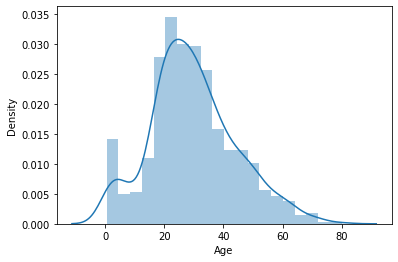

In [ ]:
sns.distplot(df['Age'].dropna())

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


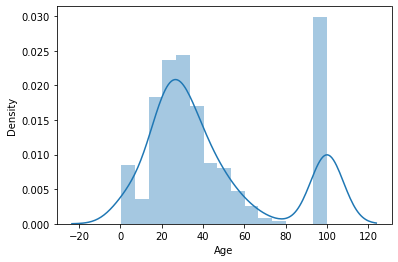

In [ ]:
sns.distplot(df['Age'].fillna(100))

# **Gaussian Distribution**

Text(0, 0.5, 'No of passengers')

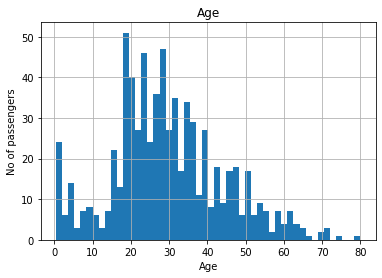

In [ ]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passengers')

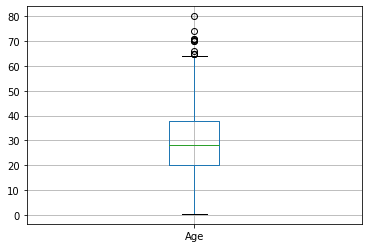

In [ ]:
figure=df.boxplot(column='Age')

In [ ]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

# **If The Data Is Normally Distributed We use this**

In [ ]:
# Assuming Age follows a Gaussian distribution we will calculate the boundaries which diferentiates the Outliers
df['Age'].mean()

29.69911764705882

In [ ]:
upper_boundary=df['Age'].mean() + 3*df['Age'].std()
lower_boundary=df['Age'].mean() - 3*df['Age'].std()

In [ ]:
upper_boundary,lower_boundary,df['Age'].mean()

(73.27860964406095, -13.88037434994331, 29.69911764705882)

# **If Features are Skewed**

Text(0, 0.5, 'No of passengers')

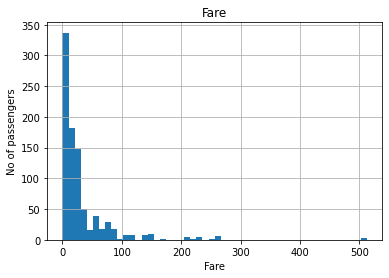

In [ ]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passengers')

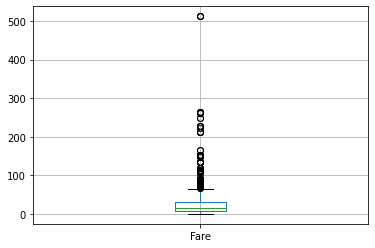

In [ ]:
figure=df.boxplot(column='Fare')

In [ ]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
# Compute the InterQuantile Range to calculate boundaries
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)

In [ ]:
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)

In [ ]:
lower_bridge,upper_bridge

(-26.724, 65.6344)

In [ ]:
# Extreme Outliers
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)

In [ ]:
lower_bridge,upper_bridge

(-61.358399999999996, 100.2688)

In [ ]:
data=df.copy()

In [ ]:
data.loc[data['Age']>=73,'Age']=73

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.loc[data['Fare']>=100,'Fare']=100

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0, 0.5, 'No of passenger')

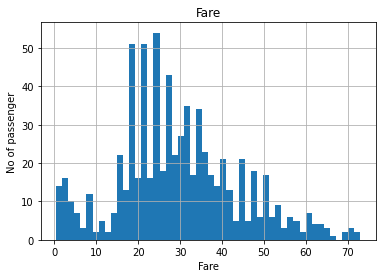

In [ ]:
figure=data.Age.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

Text(0, 0.5, 'No of passengers')

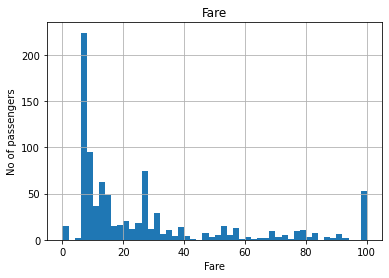

In [ ]:
figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passengers')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6791044776119403
roc_auc_score: 0.7005745778611633


In [ ]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6940298507462687
roc_auc_score: 0.7560096153846154
